In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [33]:

file_k = "k-anonymity-data-as-joinbyfield-2025-07-25 17_23_57.csv"
file_l = "l-diversity-data-as-joinbyfield-2025-07-25 17_24_12.csv"
file_latency = "New panel-data-as-joinbyfield-2025-07-25 17_23_39.csv"

df_k = pd.read_csv(file_k)
df_l = pd.read_csv(file_l)
df_latency = pd.read_csv(file_latency)


In [34]:

df_k["Time"] = pd.to_datetime(df_k["Time"])
df_l["Time"] = pd.to_datetime(df_l["Time"])
df_latency["Time"] = pd.to_datetime(df_latency["Time"])

def convert_latency_to_seconds(value):
    value = value.strip()
    if value.endswith("mins"):
        return float(value.replace(" mins", "")) * 60
    elif value.endswith("s"):
        return float(value.replace(" s", ""))
    else:
        return np.nan

df_latency["Baseline Latency"] = df_latency["Baseline Latency"].apply(convert_latency_to_seconds)
df_latency["Prink Latency"] = df_latency["Prink Latency"].apply(convert_latency_to_seconds)
df_latency["Latency Impact"] = df_latency["Prink Latency"] - df_latency["Baseline Latency"]

# Normalize time to elapsed seconds and minutes
start_time = df_k["Time"].min()
normalize_time = lambda df: (df["Time"] - start_time).dt.total_seconds()

df_k["Elapsed Seconds"] = normalize_time(df_k)
df_l["Elapsed Seconds"] = normalize_time(df_l)
df_latency["Elapsed Seconds"] = normalize_time(df_latency)

df_k["Elapsed Minutes"] = df_k["Elapsed Seconds"] / 60
df_l["Elapsed Minutes"] = df_l["Elapsed Seconds"] / 60
df_latency["Elapsed Minutes"] = df_latency["Elapsed Seconds"] / 60

# Warm-up phase tagging (first 5 minutes)
warmup_threshold = 300
warmup_minutes = warmup_threshold / 60

# Cut off data past 25 minutes
df_k = df_k[df_k["Elapsed Minutes"] <= 25]
df_l = df_l[df_l["Elapsed Minutes"] <= 25]
df_latency = df_latency[df_latency["Elapsed Minutes"] <= 25]

df_k["Warmup"] = df_k["Elapsed Seconds"] <= warmup_threshold
df_l["Warmup"] = df_l["Elapsed Seconds"] <= warmup_threshold
df_latency["Warmup"] = df_latency["Elapsed Seconds"] <= warmup_threshold


In [114]:
def plot_with_warmup_minutes_defined(x, y, y_label, title, defined=None, color='blue'):
    plt.figure(figsize=(25, 15))
    plt.plot(x, y, label=y_label, color=color)
    if defined is not None:
        plt.plot(x, defined, label=f"Defined {y_label.split()[0]}", linestyle="--")
    plt.axvspan(0, warmup_minutes, color='orange', alpha=0.3, label="Warm-up Phase (0-5 min)")
    plt.title(title, fontsize=28)
    plt.xlabel("Elapsed Time (minutes)", fontsize=24)
    plt.ylabel(y_label, fontsize=24)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

def plot_with_warmup_minutes(x, y, y_label, title, baseline=None, color='blue'):
    plt.figure(figsize=(25, 15))
    plt.plot(x, y, label=y.name if hasattr(y, "name") else y_label, color=color)
    if baseline is not None:
        plt.plot(x, baseline, label=f"Baseline {y_label.split()[0]}", linestyle="--")
    plt.axvspan(0, warmup_minutes, color='orange', alpha=0.3, label="Warm-up Phase (0-5 min)")
    plt.title(title, fontsize=28)
    plt.xlabel("Elapsed Time (minutes)", fontsize=24)
    plt.ylabel(y_label, fontsize=24)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()


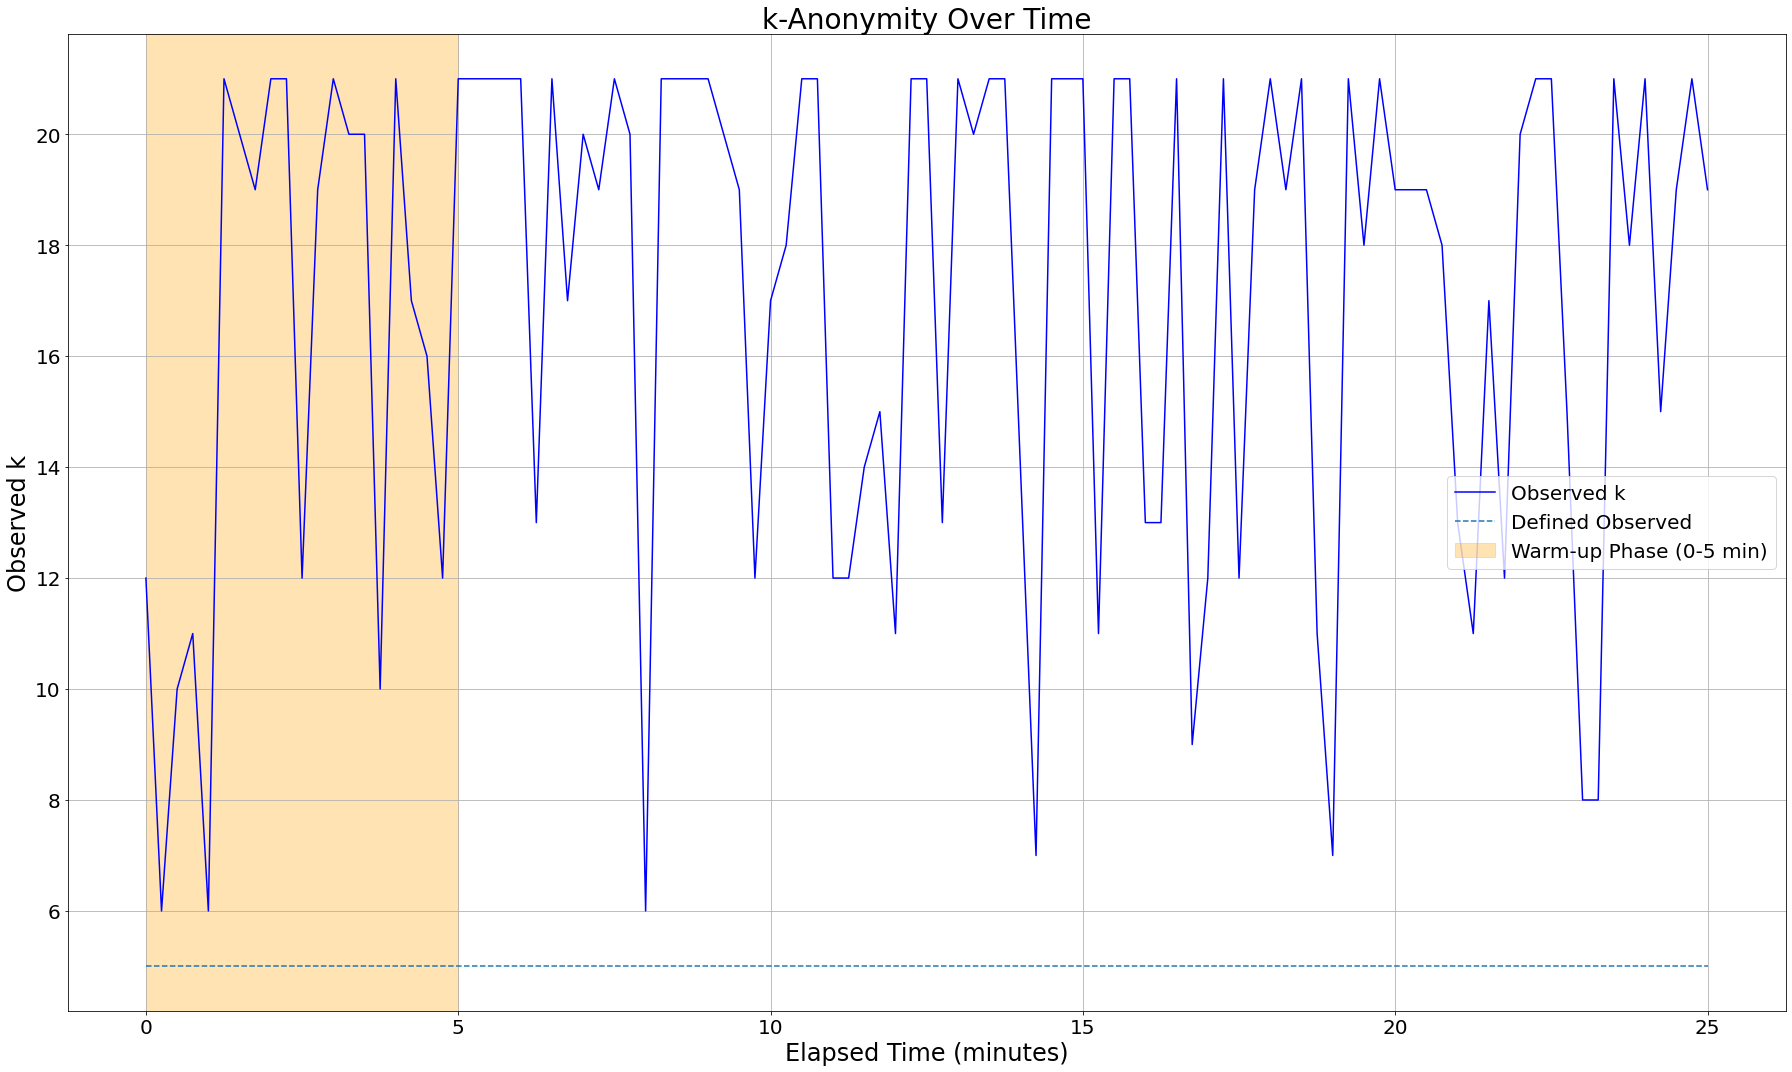

In [115]:

plot_with_warmup_minutes_defined(df_k["Elapsed Minutes"], df_k["Observed k"], "Observed k", "k-Anonymity Over Time", defined=df_k["Defined k"])


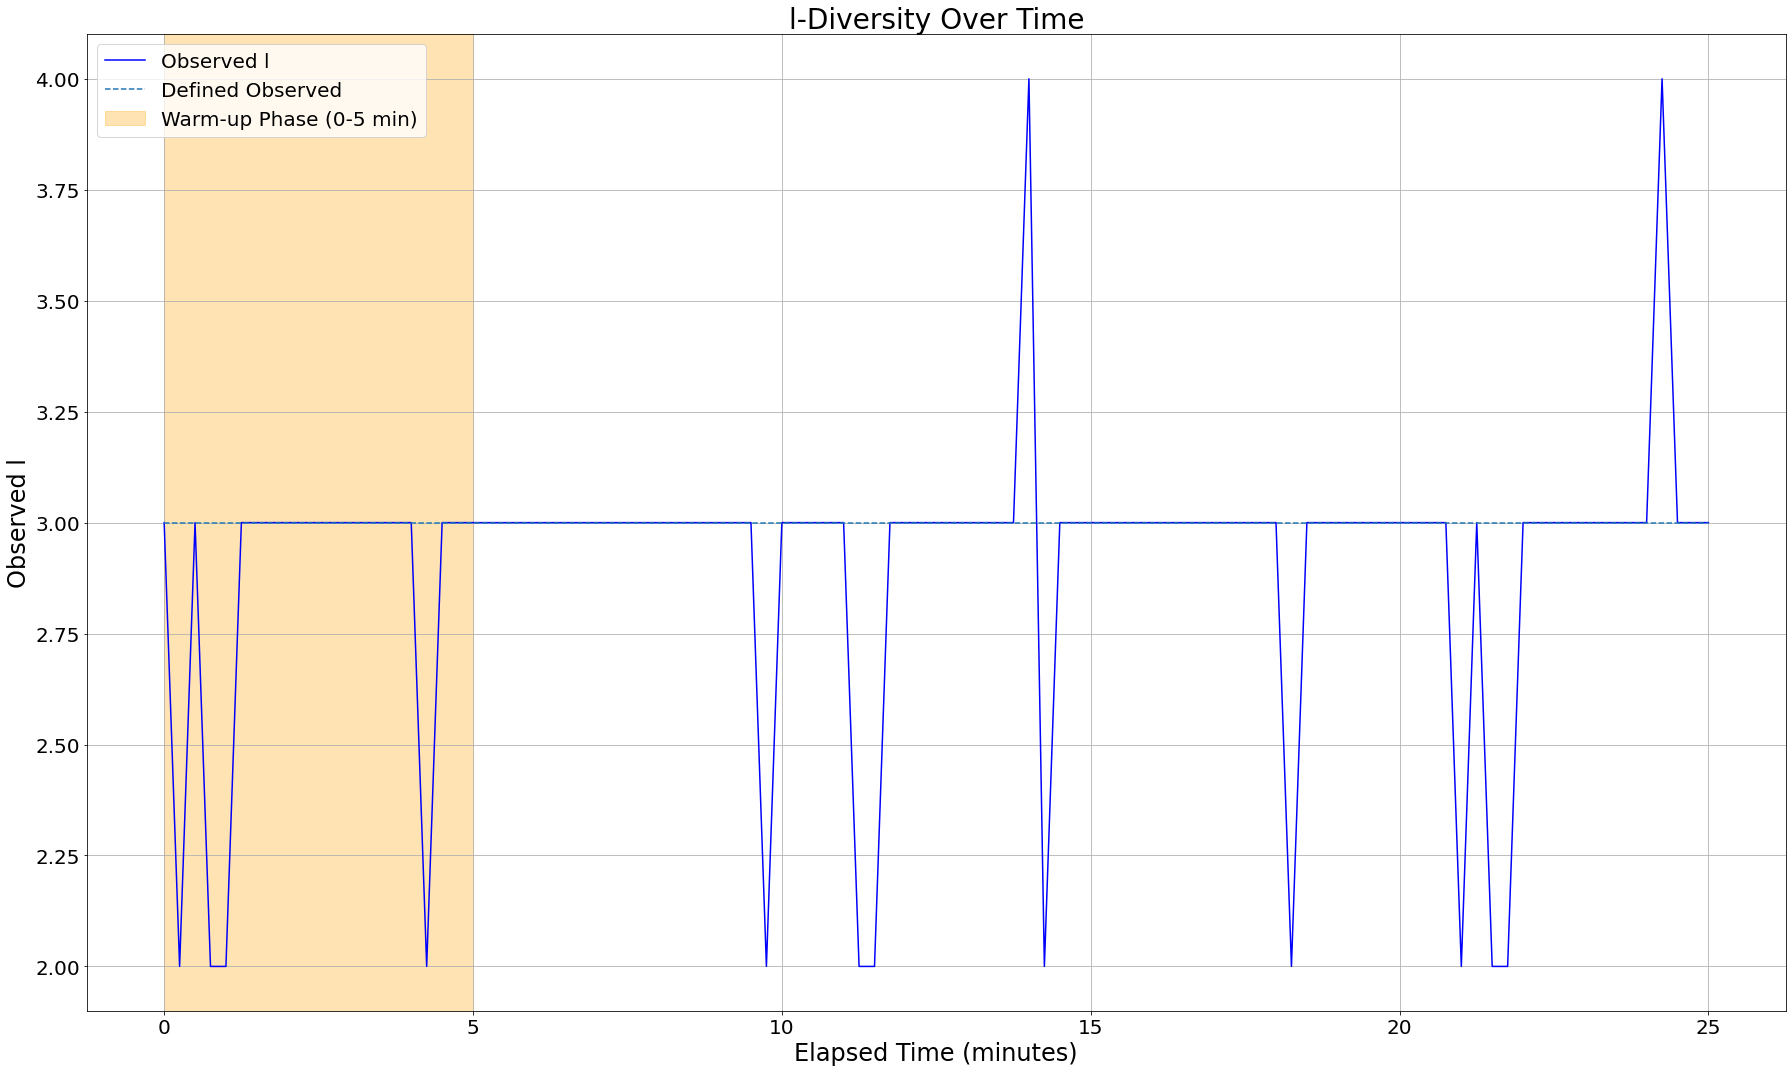

In [116]:

plot_with_warmup_minutes_defined(df_l["Elapsed Minutes"], df_l["Observed l"], "Observed l", "l-Diversity Over Time", defined=df_l["Defined l"])


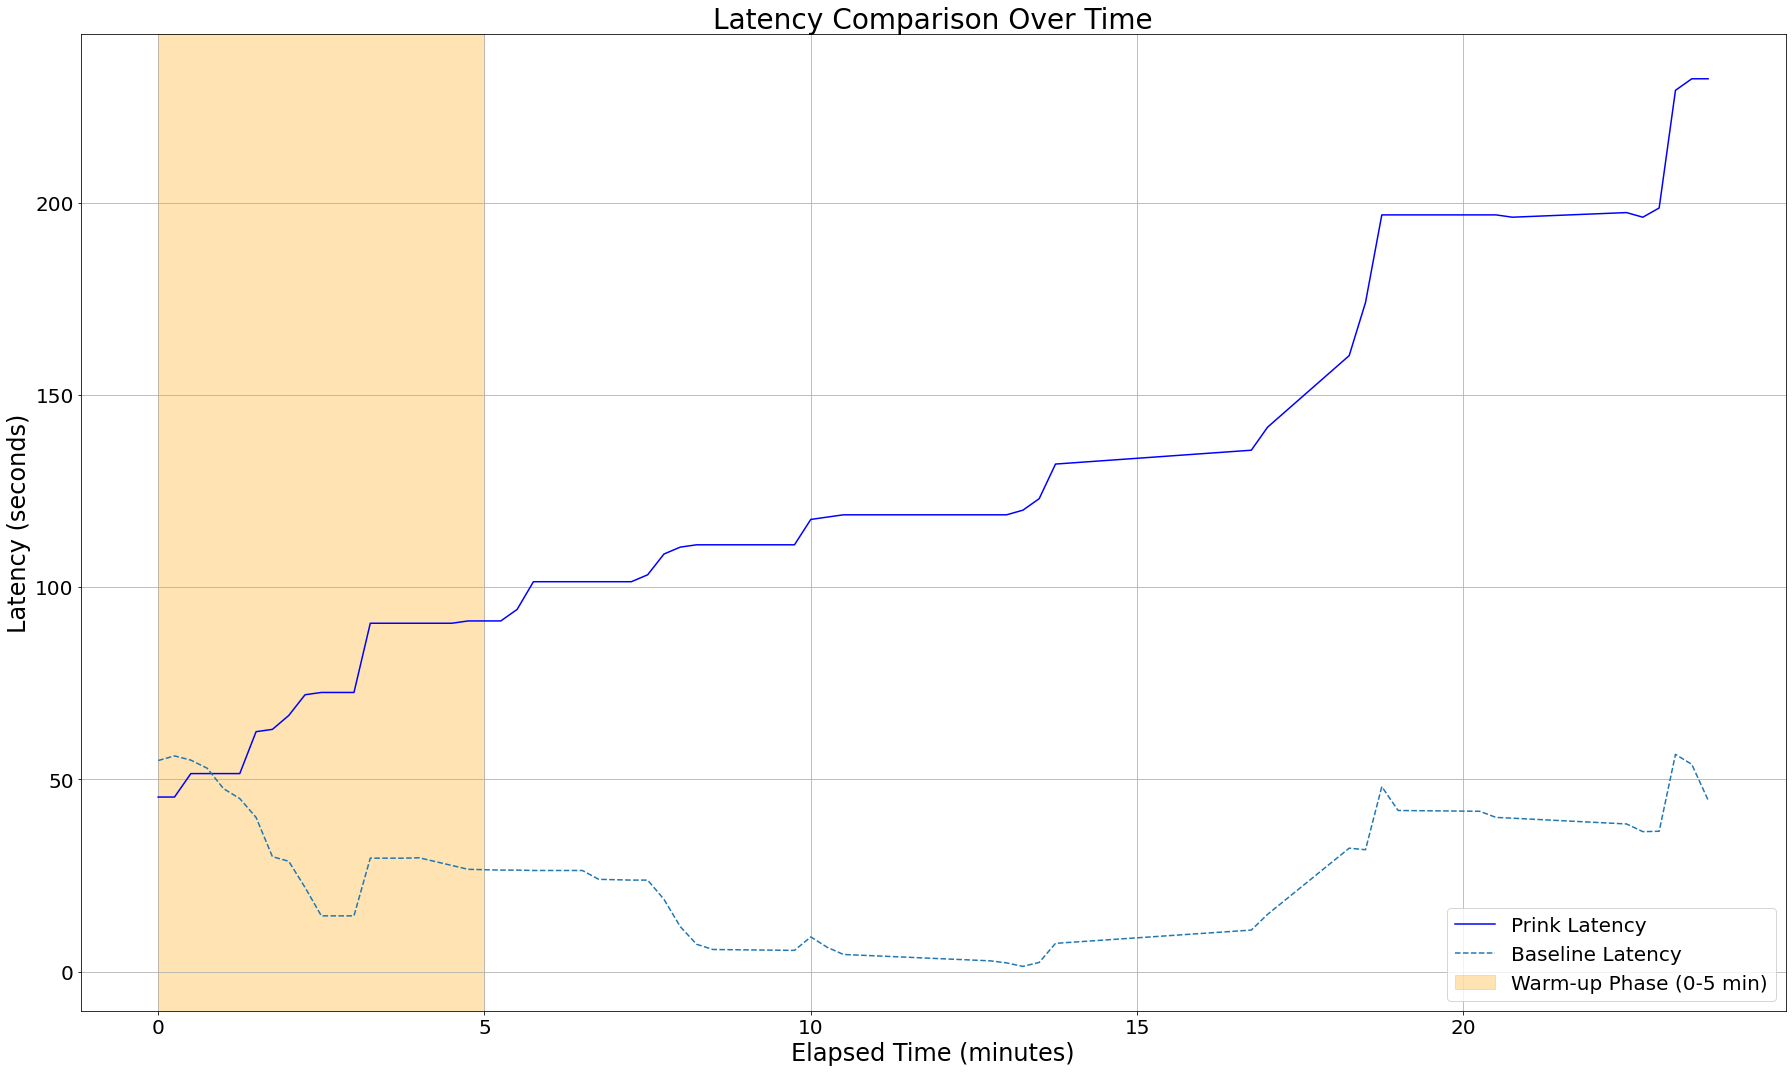

In [117]:
plot_with_warmup_minutes(
    df_latency["Elapsed Minutes"],
    df_latency["Prink Latency"],
    "Latency (seconds)",
    "Latency Comparison Over Time",
    baseline=df_latency["Baseline Latency"],
    color="blue"
)





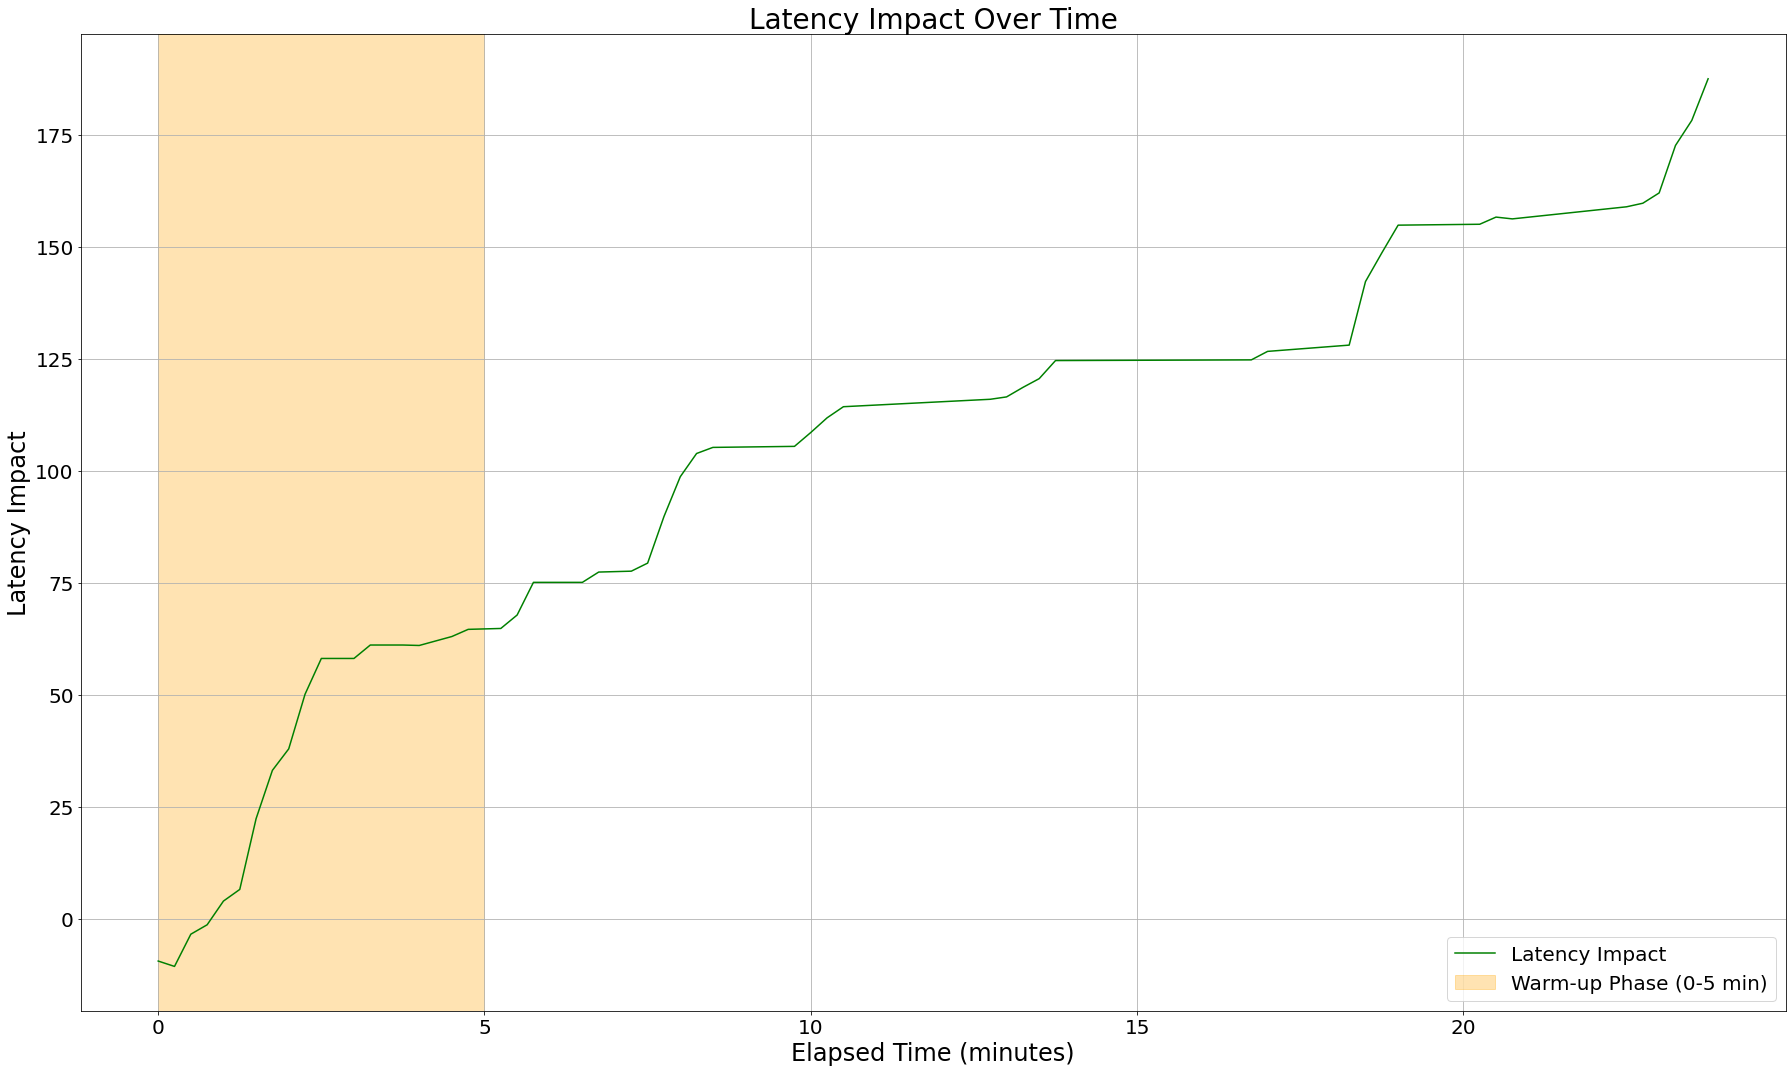

In [118]:

plot_with_warmup_minutes_defined(df_latency["Elapsed Minutes"], df_latency["Latency Impact"], "Latency Impact", "Latency Impact Over Time", color="green")


# Both privacy parameter in one plot

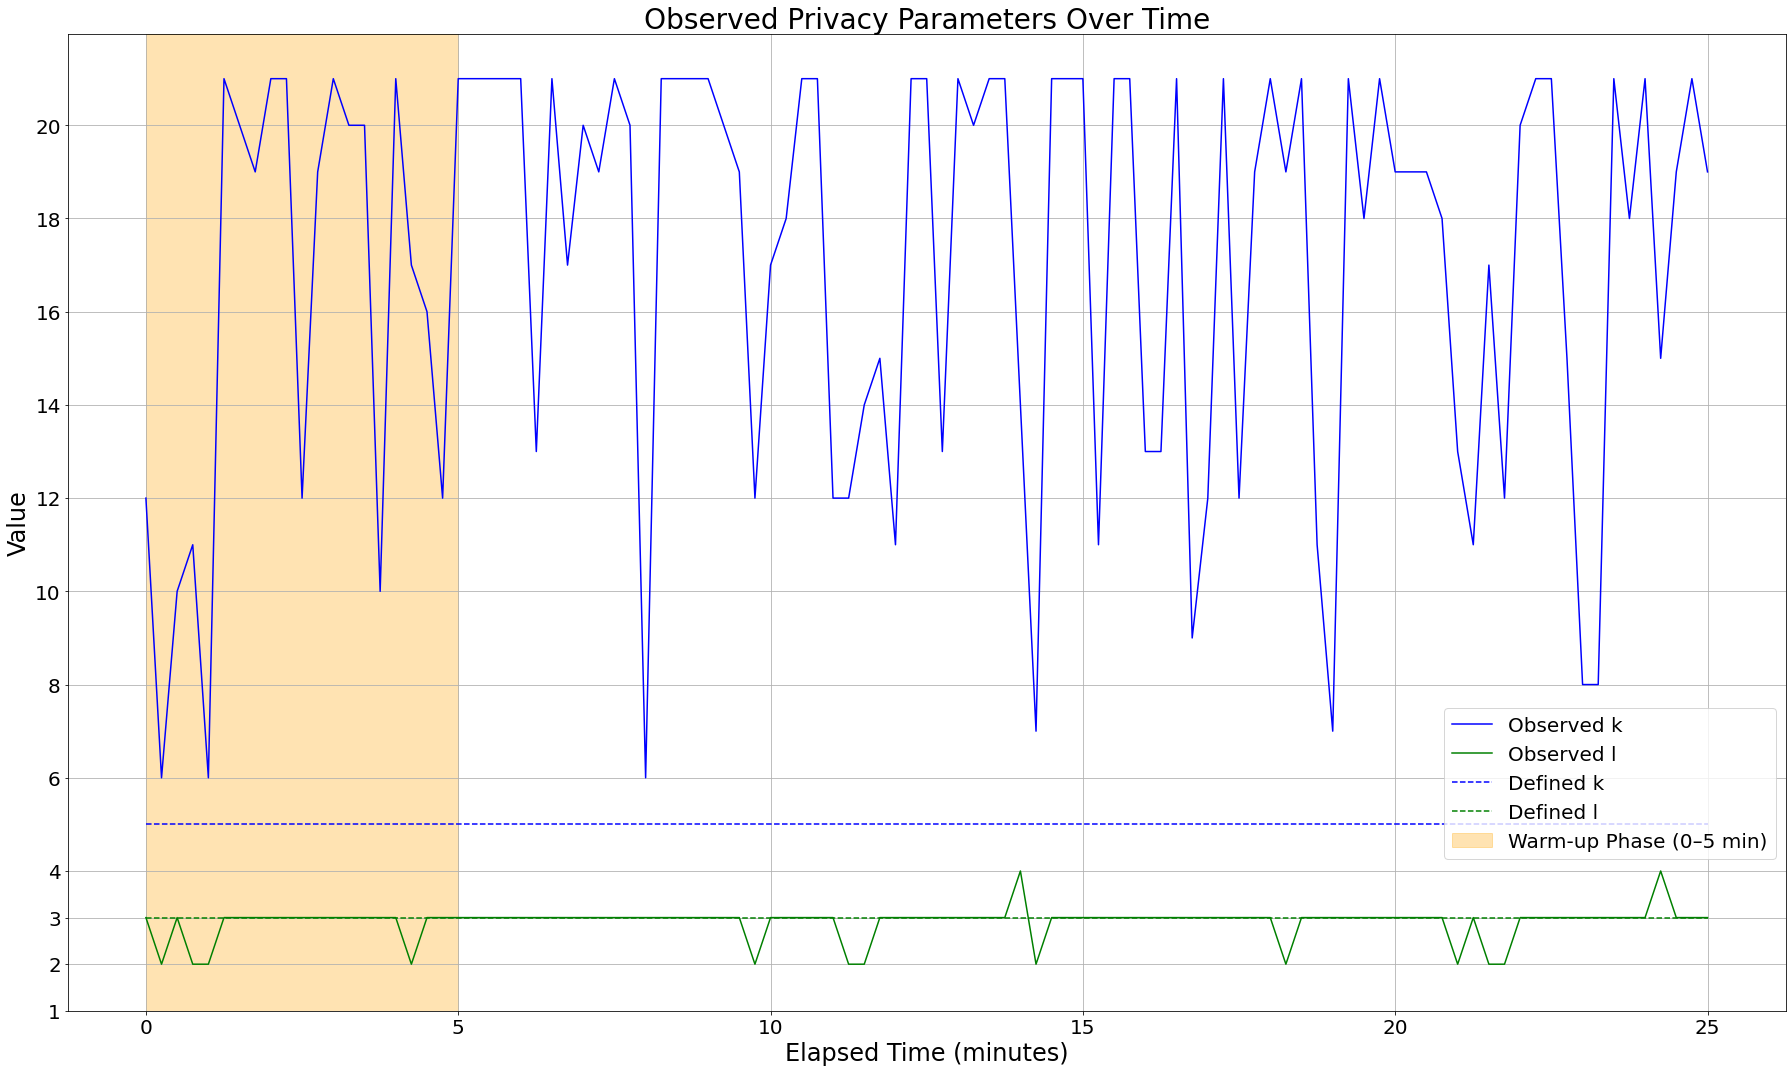

In [131]:
# Warm-up threshold in minutes
warmup_minutes = 5

# Plot observed and defined values for both privacy metrics
plt.figure(figsize=(25, 15))

# Observed values
plt.plot(df_k["Elapsed Minutes"], df_k["Observed k"], label="Observed k", color="blue")
plt.plot(df_l["Elapsed Minutes"], df_l["Observed l"], label="Observed l", color="green")

# Defined values
plt.plot(df_k["Elapsed Minutes"], df_k["Defined k"], label="Defined k", color="blue", linestyle="--")
plt.plot(df_l["Elapsed Minutes"], df_l["Defined l"], label="Defined l", color="green", linestyle="--")

# Warm-up phase shading
plt.axvspan(0, warmup_minutes, color='orange', alpha=0.3, label="Warm-up Phase (0–5 min)")

# Titles and axis labels
plt.title("Observed Privacy Parameters Over Time", fontsize=28)
plt.xlabel("Elapsed Time (minutes)", fontsize=24)
plt.ylabel("Value", fontsize=24)

# Legend (slightly moved down)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.32), fontsize=20)

# Grid and ticks
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks([1, 2, 3, 4, 6, 8, 10, 12, 14, 16, 18, 20], fontsize=20)

plt.tight_layout()
plt.show()
